In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [4]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [5]:
# Starting URL for Weather Map API Call.
# https://openweathermap.org/current this link provides instruction on how to make API call by city name
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b5ed7a13378f8b7c46aaedb980e7c222


## Create Latitude and Longitude Combinations

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

There will be **1,500 tuples** of paired latitudes and longitudes, where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])
    

37.99974485826712 101.63251932342752
83.20719318024402 145.8077516959699
8.062740168413413 149.877639566823
13.757451705732109 165.2197676597039
50.43871013823778 -8.519938279032289
-3.2177093836689323 156.8227152923351
35.07055700739302 8.949879419462974
-55.413849721037664 46.41030405280077
40.15167393803213 36.43676772614978
-41.953819389982826 -70.89230225249767
3.2444192134547194 173.22182581738105
-70.44827583564629 85.08246558755184
82.03355391332249 -165.71664966658784
57.624510412955004 56.82176582498545
-77.9226830201819 -58.77424410939656
-40.503236611278105 -126.1524701002749
30.58547473227118 128.20396061605368
57.38205885449625 51.32006359260146
-13.484074200614614 104.95379757080889
-73.97833771389776 -110.95113366974512
21.82119167558659 108.1648860927084
-54.6990320470246 -98.17376228825583
15.013148976686466 -39.68205677118462
-26.024574278661348 -137.03827427341116
-73.49053208816906 124.49127020253661
7.756950234374671 72.59265680311495
-41.95776844719558 -147.99887

-75.69713019505288 -93.45693470804002
-9.668711534680668 -45.0085320183872
86.23476667631033 12.057440372274698
38.96304761435388 52.21081821643003
82.55995026168162 -149.2778805840833
-72.25997102739464 131.17342908020214
5.266756620495556 -3.599336335907168
60.16358130990801 -99.09415719267199
12.187910354218076 5.859439835792273
62.86564758968021 165.63214261717354
34.09412588352474 -167.03692215314356
73.71791382632287 -105.21134129340027
-57.287429427006835 -94.47216129301275
-61.242476580804194 -45.33026306959479
81.36429377367179 -40.342111784527134
13.634515678508606 -102.16221295095397
-39.760310807111395 -32.43967121201766
-14.998120198382182 -29.648813693653693
10.802911587482484 1.5522765800106697
81.12189490143302 22.68639198333753
53.63807126034621 -49.281762087216435
30.348343100628938 -71.10274014314315
24.481495239988007 -113.75690950235082
89.5800985035234 41.92508771335238
41.93122616108104 -102.7981136363438
9.327934461409669 -32.62404812097208
80.54192781247389 -7.

In [11]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy


In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


620

## Loop Through the List of Cities and Build the City URL

In [14]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 10 == 0 and i >= 10):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

Beginning Data Retrieval     
-----------------------------


Every time we want to reference the city in our code, we need to use the indexing on the cities list. Unfortunately, this will cause programming errors when we are building the city_url because it adds the index, not the city name, to the city_url. To fix this issue, we need to create another for loop to get the city from the cities list.
Or we need to use the enumerate() method

In [15]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(50)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 62 | jinchang
Processing Record 2 of Set 62 | chokurdakh
Processing Record 3 of Set 62 | lorengau
Processing Record 4 of Set 62 | butaritari
Processing Record 5 of Set 62 | clonakilty
Processing Record 6 of Set 62 | kieta
Processing Record 7 of Set 62 | subaytilah
City not found. Skipping...
Processing Record 8 of Set 62 | east london
Processing Record 9 of Set 62 | tokat
Processing Record 10 of Set 62 | san carlos de bariloche
Processing Record 11 of Set 62 | busselton
Processing Record 12 of Set 62 | barrow
Processing Record 13 of Set 62 | kungur
Processing Record 14 of Set 62 | ushuaia
Processing Record 15 of Set 62 | rikitea
Processing Record 16 of Set 62 | fukue
Processing Record 17 of Set 62 | kilmez
City not found. Skipping...
Processing Record 18 of Set 62 | palabuhanratu
City not found. Skipping...
Processing Record 19 of Set 62 | punta arenas
Processing Record 20 of Set 62 | qinzhou
Processing Record 21 of Set 62 | castro
Processing Record 22 of Set

Processing Record 36 of Set 65 | puerto ayora
Processing Record 37 of Set 65 | atuona
Processing Record 38 of Set 65 | samalaeulu
City not found. Skipping...
Processing Record 39 of Set 65 | chirongui
Processing Record 40 of Set 65 | san quintin
Processing Record 41 of Set 65 | georgiyevka
Processing Record 42 of Set 65 | colares
Processing Record 43 of Set 65 | loandjili
Processing Record 44 of Set 65 | luoyang
Processing Record 45 of Set 65 | thompson
Processing Record 46 of Set 65 | lagoa
Processing Record 47 of Set 65 | ondorhaan
City not found. Skipping...
Processing Record 48 of Set 65 | ribeira grande
Processing Record 49 of Set 65 | saint george
Processing Record 50 of Set 65 | dingle
Processing Record 1 of Set 66 | manali
Processing Record 2 of Set 66 | cherskiy
Processing Record 3 of Set 66 | strezhevoy
Processing Record 4 of Set 66 | nizhneyansk
City not found. Skipping...
Processing Record 5 of Set 66 | honningsvag
Processing Record 6 of Set 66 | nanded
City not found. Skip

Processing Record 16 of Set 69 | bambanglipuro
Processing Record 17 of Set 69 | thatcham
Processing Record 18 of Set 69 | nikolskoye
Processing Record 19 of Set 69 | kiunga
Processing Record 20 of Set 69 | chengde
Processing Record 21 of Set 69 | purwodadi
Processing Record 22 of Set 69 | rawson
Processing Record 23 of Set 69 | yuxia
Processing Record 24 of Set 69 | quatre cocos
Processing Record 25 of Set 69 | jarjis
City not found. Skipping...
Processing Record 26 of Set 69 | vao
Processing Record 27 of Set 69 | qandahar
City not found. Skipping...
Processing Record 28 of Set 69 | stromness
Processing Record 29 of Set 69 | hami
Processing Record 30 of Set 69 | yuncheng
Processing Record 31 of Set 69 | constitucion
Processing Record 32 of Set 69 | comodoro rivadavia
Processing Record 33 of Set 69 | hurghada
Processing Record 34 of Set 69 | qeshm
Processing Record 35 of Set 69 | sangar
Processing Record 36 of Set 69 | grand river south east
City not found. Skipping...
Processing Record

Processing Record 1 of Set 73 | kalininsk
Processing Record 2 of Set 73 | alice springs
Processing Record 3 of Set 73 | dali
Processing Record 4 of Set 73 | namatanai
Processing Record 5 of Set 73 | nabire
Processing Record 6 of Set 73 | rio tercero
Processing Record 7 of Set 73 | beloha
Processing Record 8 of Set 73 | xique-xique
Processing Record 9 of Set 73 | mayo
Processing Record 10 of Set 73 | veydelevka
Processing Record 11 of Set 73 | truckee
Processing Record 12 of Set 73 | aguimes
Processing Record 13 of Set 73 | ayna
Processing Record 14 of Set 73 | berbera
Processing Record 15 of Set 73 | mangrol
Processing Record 16 of Set 73 | neuquen
Processing Record 17 of Set 73 | paradwip
City not found. Skipping...
Processing Record 18 of Set 73 | pacifica
Processing Record 19 of Set 73 | terrace
Processing Record 20 of Set 73 | los llanos de aridane
Processing Record 21 of Set 73 | mufumbwe
Processing Record 22 of Set 73 | mineiros
Processing Record 23 of Set 73 | tabiauea
City not 

## Create a DataFrame of City Weather Data
**1- Converting the array of dictionaries to a DataFrame**

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jinchang,38.4953,102.1739,61.25,32,14,7.40,CN,2022-09-27 20:54:55
1,Chokurdakh,70.6333,147.9167,21.76,88,100,7.09,RU,2022-09-27 20:52:21
2,Lorengau,-2.0226,147.2712,81.68,78,94,9.24,PG,2022-09-27 20:54:55
3,Butaritari,3.0707,172.7902,82.78,71,37,17.52,KI,2022-09-27 20:54:56
4,Clonakilty,51.6231,-8.8706,54.61,91,100,15.39,IE,2022-09-27 20:54:56
5,Kieta,-6.2167,155.6333,80.31,80,84,3.91,PG,2022-09-27 20:54:56
6,East London,-33.0153,27.9116,67.64,92,100,23.60,ZA,2022-09-27 20:54:57
7,Tokat,40.4167,36.5833,58.48,15,31,5.88,TR,2022-09-27 20:54:57
8,San Carlos De Bariloche,-41.1456,-71.3082,64.15,19,0,9.22,AR,2022-09-27 20:50:29
9,Busselton,-33.6500,115.3333,49.95,91,15,8.43,AU,2022-09-27 20:54:57


**2- Reorder the columns**

In [17]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jinchang,CN,2022-09-27 20:54:55,38.4953,102.1739,61.25,32,14,7.40
1,Chokurdakh,RU,2022-09-27 20:52:21,70.6333,147.9167,21.76,88,100,7.09
2,Lorengau,PG,2022-09-27 20:54:55,-2.0226,147.2712,81.68,78,94,9.24
3,Butaritari,KI,2022-09-27 20:54:56,3.0707,172.7902,82.78,71,37,17.52
4,Clonakilty,IE,2022-09-27 20:54:56,51.6231,-8.8706,54.61,91,100,15.39
5,Kieta,PG,2022-09-27 20:54:56,-6.2167,155.6333,80.31,80,84,3.91
6,East London,ZA,2022-09-27 20:54:57,-33.0153,27.9116,67.64,92,100,23.60
7,Tokat,TR,2022-09-27 20:54:57,40.4167,36.5833,58.48,15,31,5.88
8,San Carlos De Bariloche,AR,2022-09-27 20:50:29,-41.1456,-71.3082,64.15,19,0,9.22
9,Busselton,AU,2022-09-27 20:54:57,-33.6500,115.3333,49.95,91,15,8.43


**3- Create an output file to save the DataFrame as a CSV**

In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Plot Weather Data 
First, we'll retrieve the data we need to create our scatter plots.

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

### Plot Latitude vs Temperature

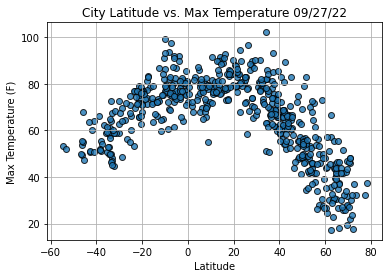

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

### Plot Latitude vs Humidity

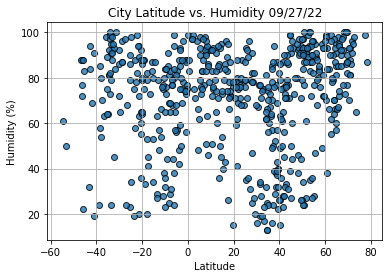

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

### Plot Latitude vs Cloudiness

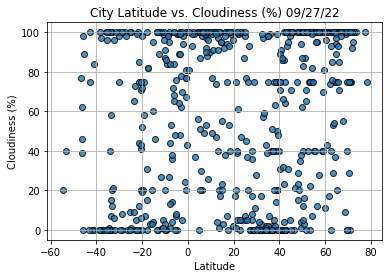

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


### Plot Latitude vs. Wind Speed

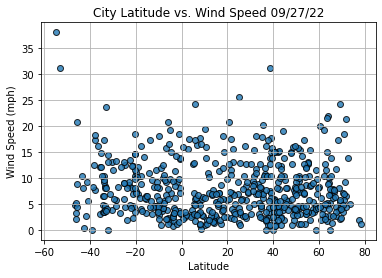

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

## Find the Correlation Between Latitude and Maximum Temperature

In [33]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)

In [34]:
# Get the equation of the line.
lin_eq = "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(lin_eq)

y=-0.23x + 69.81


In [35]:
# Calculate the regression line "y values" from the slope and intercept.
regression_values = (slope*lats+intercept) 
regression_values

0      60.932471
1      53.517129
2      70.281344
3      69.106144
4      57.903436
         ...    
561    58.362551
562    62.484990
563    74.954569
564    74.504729
565    67.015091
Name: Lat, Length: 566, dtype: float64

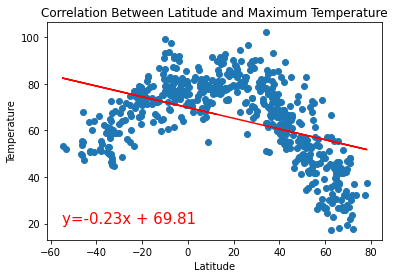

In [39]:
# Create a scatter plot of the lats and max_temps values.
plt.scatter(lats, max_temps)

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats, regression_values,'r')

# Annotate the text for the line equation and add its coordinates.
plt.annotate(lin_eq, (-55,20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Correlation Between Latitude and Maximum Temperature")
plt.show()

### Create a Linear Regression Function
Instead of repeating the above code many times we will create a function to perform linear regression on the weather data and plot a regression line and equation

In [42]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [43]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [44]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jinchang,CN,2022-09-27 20:54:55,38.4953,102.1739,61.25,32,14,7.40
1,Chokurdakh,RU,2022-09-27 20:52:21,70.6333,147.9167,21.76,88,100,7.09
3,Butaritari,KI,2022-09-27 20:54:56,3.0707,172.7902,82.78,71,37,17.52
4,Clonakilty,IE,2022-09-27 20:54:56,51.6231,-8.8706,54.61,91,100,15.39
7,Tokat,TR,2022-09-27 20:54:57,40.4167,36.5833,58.48,15,31,5.88


In [45]:
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Lorengau,PG,2022-09-27 20:54:55,-2.0226,147.2712,81.68,78,94,9.24
5,Kieta,PG,2022-09-27 20:54:56,-6.2167,155.6333,80.31,80,84,3.91
6,East London,ZA,2022-09-27 20:54:57,-33.0153,27.9116,67.64,92,100,23.60
8,San Carlos De Bariloche,AR,2022-09-27 20:50:29,-41.1456,-71.3082,64.15,19,0,9.22
9,Busselton,AU,2022-09-27 20:54:57,-33.6500,115.3333,49.95,91,15,8.43


### Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

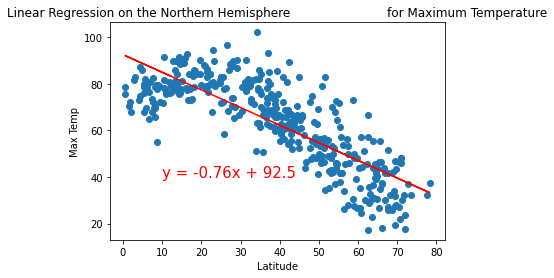

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

### Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

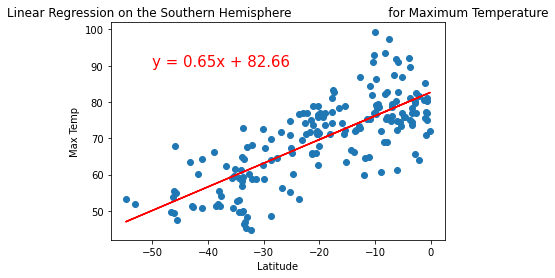

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

**Finding** <br/>
The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 

### Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

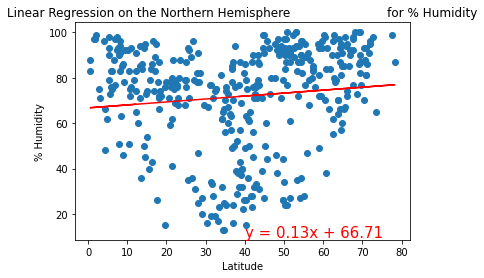

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

### Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

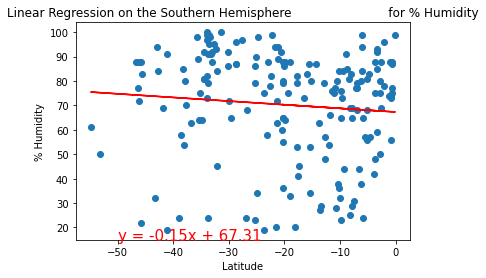

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

**Finding** <br/> The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. Check the r-values for your plots. 

### Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

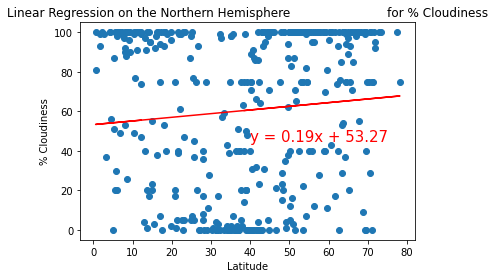

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,45))

### Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere


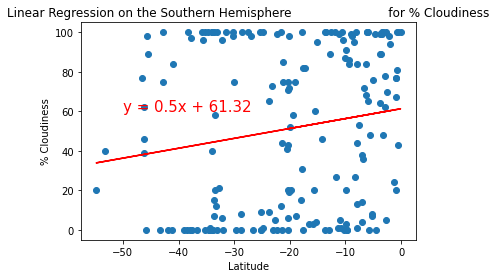

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

**Finding** <br/> The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. Check the r-values for your plots. 

### Perform Linear Regression on the Wind Speed for the Northern Hemisphere

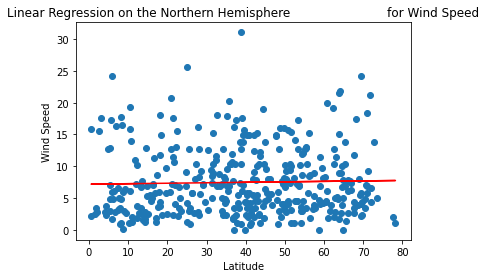

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

### Perform Linear Regression on the Wind Speed for the Southern Hemisphere

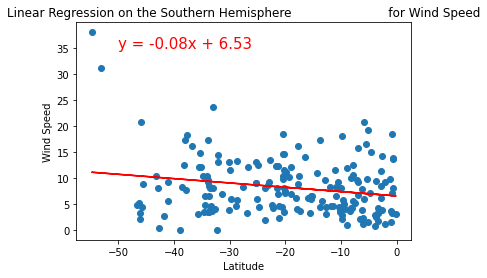

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

**Finding** <br/> The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. Check the r-values for your plots. 